# Import data and libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

In [24]:
data = pd.read_csv('01_Melbourne_Residential.csv')

# EDA

In [25]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### Price Trends  
- The average house price is about **$1.08M**, but there’s a **huge range**—from **$85K to $9M**.  
- The median price is **$903K**, which is lower than the average. This suggests there are some really expensive properties pushing the average up.  

### Property Features  
- Most homes have **around 3 bedrooms, 1-2 bathrooms, and space for 1-2 cars**.  
- Some outliers have up to **20 bedrooms or 8 bathrooms**, which are definitely not typical.  
- **Land size varies a lot**—while the median is **440 sqm**, some properties have over **433,000 sqm**.  

### Location & Distance  
- On average, properties are **10 km from the city**, but some go as far as **48 km out**.  
- The postcodes range from **3000 to 3977**, covering a wide area from inner city to outer suburbs.  

### Age of Homes  
- Most homes were built around **1964-1970**, meaning a lot of them are older properties.  
- The oldest recorded build year is **1196**, which is clearly an error.  
- Newer homes go up to **2018**, but there aren’t as many.  

### Potential Issues  
- **Outliers everywhere**, from extreme land sizes to million dollar price jumps. These might need to be filtered out for analysis.  
- **Data errors**, like the **year 1196**, should be cleaned up.  
- **Price distribution looks skewed**, with expensive properties pulling the average up.  


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   Seller         13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### DataFrame Overview  

- **Total Entries:** 13,580  
- **Total Columns:** 21  
- **Memory Usage:** 2.2+ MB  

### **Missing Values & Potential Issues**  

- **Car:** 62 missing values  
- **BuildingArea:** 6,450 missing values (~50%)  
- **YearBuilt:** 5,375 missing values  
- **CouncilArea:** 1,369 missing values  
- **Date:** Stored as object, should be converted to `datetime`  


In [27]:
columns = ['Propertycount']
for column in columns:
    print(column, data[column].unique())

Propertycount [ 3464  3280  2211  5301  5132  4836  6567  3052  2894  4502  2952  5682
  7809  6795 10969  4605  3589 10579  6938 11918  7082  4480  5678  8920
  3265  3106  7822  2379  6923  5051  3582  2954 11204  4553  9028  4898
  8989  9264  1308  2970  5825  6244  3593  7570 10412  8870  1071  2606
  5454 11308  2947  2674  3145  5549  5629  5263 10331  2671  3873  8801
  2019  2079  6232  2555  5498  2291  6821 11364  2651  3692  2309  7485
  8648  7717 14577 21650 14949  3540  2417  5943 14887  8400  1223 13240
  3284  3755  4217  6763  5457  5420  2698  2230  6380   802  4380  1369
  6543  4019  3445  1202  4918 17496  7217  2329  1543  5533   438  1889
  6786  3040   588  5070  6482  2890  1554  1414  1808  3578  5058  2185
  4675  4442  2403  3224  1123   984   790   608   852   851   821  1119
  1651   962   389  4707  1052  2356  5030  3598  5366 17093  9704  1390
  4294 10175  1686  4048  7719  9758 15510  7680 11925 10894  8322  4258
  3940 10999  4790  7254  6990 10926 

### Key Observations

### Pricing Trends
- The **average price** of a property is around **$1.08M**, but there's a high standard deviation (~$639K), indicating a large variation in property prices.  
- The **minimum price** is **$85K**, and the **maximum price** reaches **$9M**, showing a wide range of affordability.  

### Property Size & Features
- **Average rooms:** ~2.94 (almost 3), which aligns with typical Australian housing.  
- **Bathroom average:** 1.53, indicating most houses have **1-2 bathrooms**.  
- **Car spaces:** Average is **1.61**, meaning most houses have parking for **1-2 cars**.  

### Land & Building Area
- The **median land size** is **440 sqm**, but the distribution is skewed due to some extremely large properties (max = 433,014 sqm).  
- **Building area data is incomplete**, with only **7,130 entries out of 13,580**, making it less reliable for analysis.  

### Geographical Distribution
- **Postcode range:** 3000 – 3977 (covering Melbourne and surrounding suburbs).  
- **Lattitude & Longitude:** The data covers a **broad spread of Melbourne** suburbs.  

### Year Built
- The **average construction year is 1964**, meaning many homes are over **50 years old**.  
- The data is **missing for over 5,000 properties**, which might impact trend analysis.  

### Property Count per Region
- The **Propertycount column** represents the total number of properties in different suburbs.  
- The **highest count is 21,650**, showing highly populated areas with dense real estate activity.  
- The **lowest is 249**, suggesting some regions have very limited sales data.  

In [28]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
0,Airport West,154 Halsey Rd,3,t,840000,PI,Nelson,3/9/2023,13.5,3042,3,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464
1,Albert Park,105 Kerferd Rd,2,h,1275000,S,hockingstuart,3/9/2023,3.3,3206,2,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280
2,Albert Park,85 Richardson St,2,h,1455000,S,Thomson,3/9/2023,3.3,3206,2,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280
3,Alphington,6 Smith St,4,h,2000000,S,Brace,3/9/2023,6.4,3078,3,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211
4,Alphington,5/6 Yarralea St,3,h,1110000,S,Jellis,3/9/2023,6.4,3078,3,2,2.0,208,NaN,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211


This dataset contains real estate transaction data for various suburbs in Melbourne. It includes details about each property, such as:

- **Location**: Suburb, address, postcode  
- **Physical Characteristics**: Rooms, type, bedrooms, bathrooms, car spaces, land size, building area, year built  
- **Sale Details**: Price, method, seller, date  
- **Geographical Attributes**: Latitude, longitude, region, council area, distance from the city, property count in the suburb  

### Key Observations

- The dataset covers different **property types** (`h` = house, `t` = townhouse, etc.), providing insights into market diversity.  
- **Price variations** are evident, with properties ranging from **$840K to $2M+** in just this small sample.  
- **Some missing values** (`NaN` in `BuildingArea` and `YearBuilt`) could affect certain analyses, especially trend evaluations.  
- **Regions vary**, with suburbs categorized under **Western, Southern, and Northern Metropolitan areas**, which might impact pricing trends and demand.  
- **Property count per suburb** helps gauge market density, e.g., **Albert Park (3280) vs. Alphington (2211)**.  


In [29]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
Seller            object
Date              object
Distance         float64
Postcode           int64
Bedroom2           int64
Bathroom           int64
Car              float64
Landsize           int64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Region            object
Propertycount      int64
dtype: object

The data types are corrext and the data is clean.

In [30]:
print(data.isnull().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
Seller              0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Region              0
Propertycount       0
dtype: int64


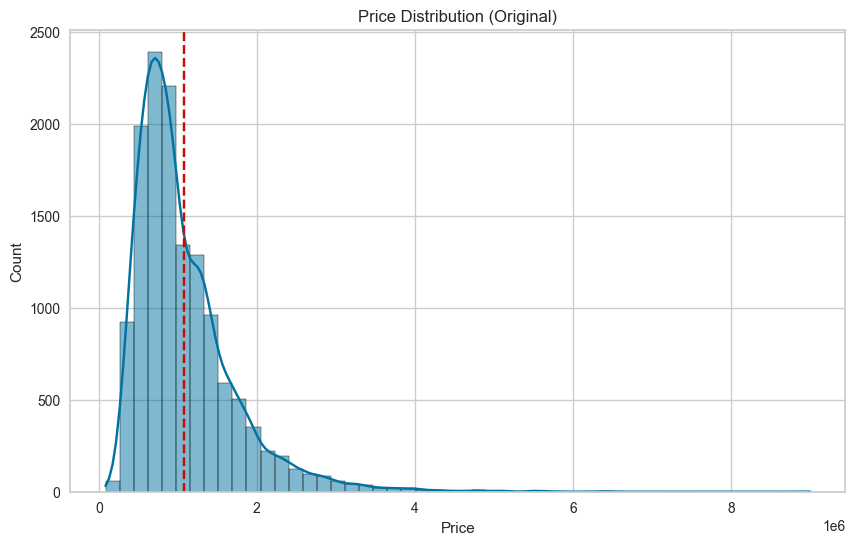

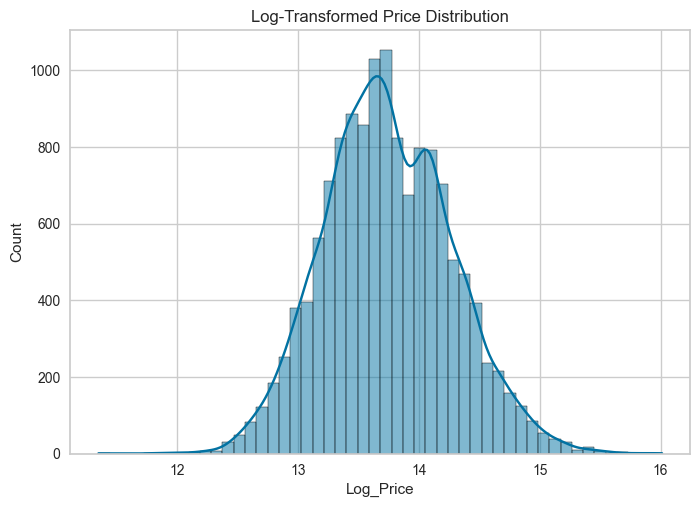

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, bins=50)
plt.title('Price Distribution (Original)')
plt.axvline(data['Price'].mean(), color='r', linestyle='--')
plt.show()

# Log-transformed Price
data['Log_Price'] = np.log(data['Price'])
sns.histplot(data['Log_Price'], kde=True, bins=50)
plt.title('Log-Transformed Price Distribution')
plt.show()

Looking at the price distribution plot, I noticed that the data is right skewed, with most prices clustered on the lower end and a long tail stretching out to the right. The peak is around the lower price range, but the mean is pulled to the right because of some high-priced outliers.

This skewness and the presence of outliers could be problematic, especially if I’m planning to use models that assume a normal distribution, like linear regression. The outliers might distort the results and impact model accuracy.

To address this, I could:

Apply a log transformation to reduce the skewness and make the data more normally distributed.
Handle the outliers by capping or removing extreme values.
Choose models that are better at handling skewed data, like Random Forest or Gradient Boosting.


====================================================================================================


After applying a log transformation to the price data, the distribution looks much better. It’s now closer to a normal distribution, with the skewness significantly reduced. The peak is well centered, and the long right tail from the original plot has been compressed.

This transformation should help improve the performance of models that assume normality, like linear regression, by stabilizing variance and reducing the impact of outliers. It also makes it easier to interpret relationships in the data.

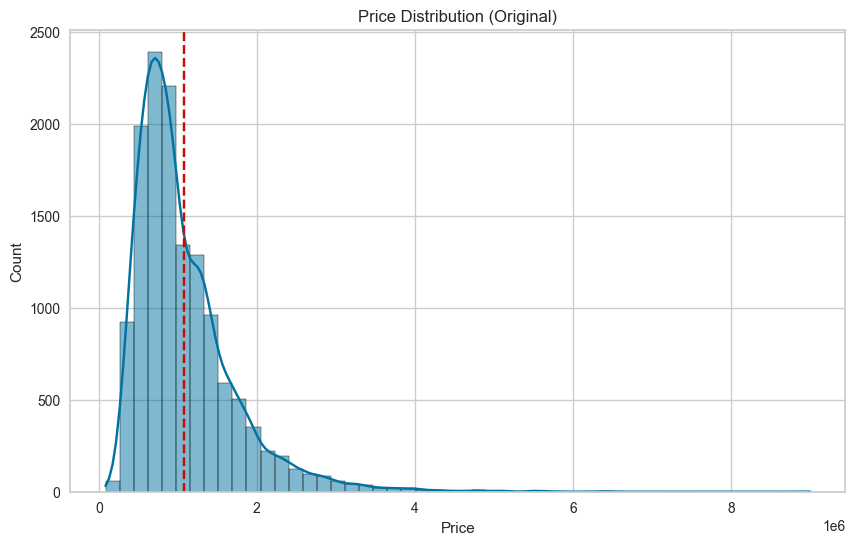

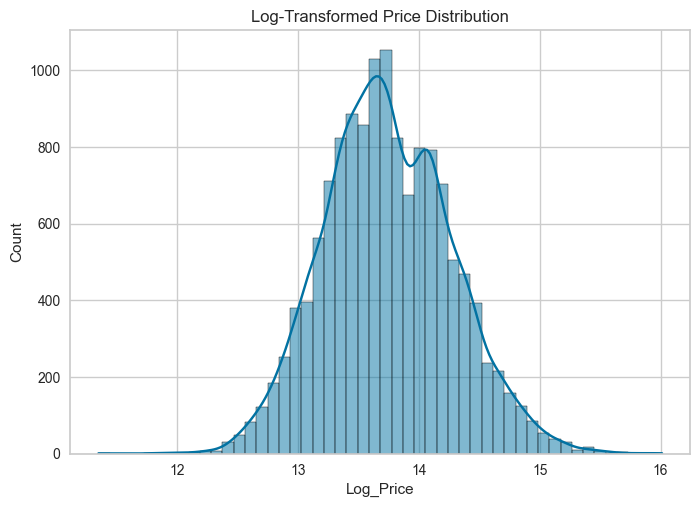

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, bins=50)
plt.title('Price Distribution (Original)')
plt.axvline(data['Price'].mean(), color='r', linestyle='--')
plt.show()

# Log-transformed Price
data['Log_Price'] = np.log(data['Price'])
sns.histplot(data['Log_Price'], kde=True, bins=50)
plt.title('Log-Transformed Price Distribution')
plt.show()

When I first looked at the **original price distribution**, it was obvious the data was **right-skewed**. Most of the prices were bunched up at the lower end, with a long tail stretching to the right. The **mean** was pulled away from the peak because of some really high values. These outliers stood out and could mess with models that assume normality, like linear regression.  

To fix this, I applied a **log transformation**, and the results were much better. The **log-transformed distribution** looks way more **normal** now the skewness is reduced, and the data is more evenly spread around the center. This should make models perform better by stabilizing variance and reducing the impact of outliers, making it more suitable for models that expect normally distributed data.  

Now that the data is cleaned up, I can proceed with modeling without skewness and outliers throwing things off.

====================================================================================================

After seeing how skewed the original price distribution was, I applied a **log transformation** to fix it and it worked pretty well. The data now looks much more **normally distributed**, with a clear peak near the center and a more balanced spread on both sides. The long tail from the original plot has been compressed, and the outliers aren’t as extreme anymore.

This transformation helps stabilize variance and makes the data better suited for models like linear regression that assume normality. It also makes it easier to spot patterns without outliers skewing the results. With the data cleaned up like this, I feel more confident moving forward with the modeling process.

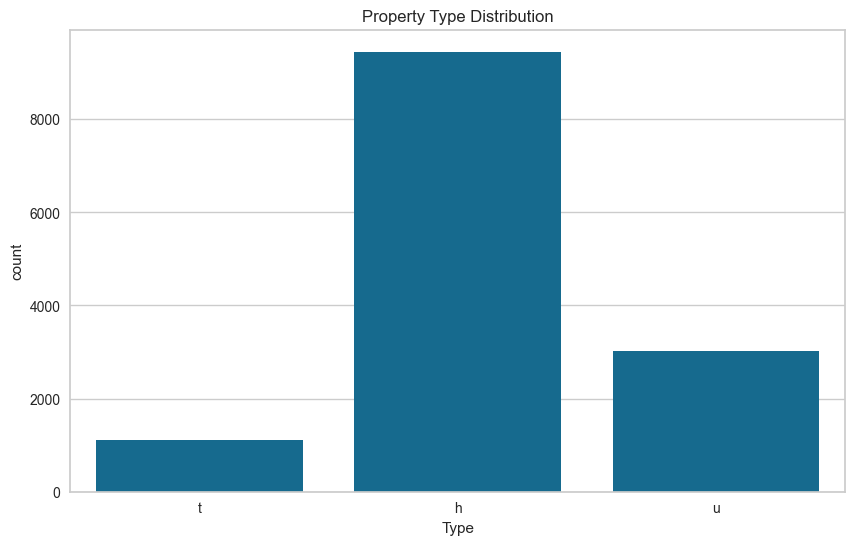

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=data)
plt.title('Property Type Distribution')
plt.show()

When I looked at the **Property Type Distribution**, it was obvious that **houses ('h')** make up the majority of the listings by a large margin. **Units ('u')** follow but are still significantly fewer, and **townhouses ('t')** are the least represented.

This kind of imbalance might impact model performance, especially if property type is an important feature. I’ll need to consider this during modeling  maybe by balancing the classes or using stratified sampling to ensure the model doesn’t lean too heavily towards houses.

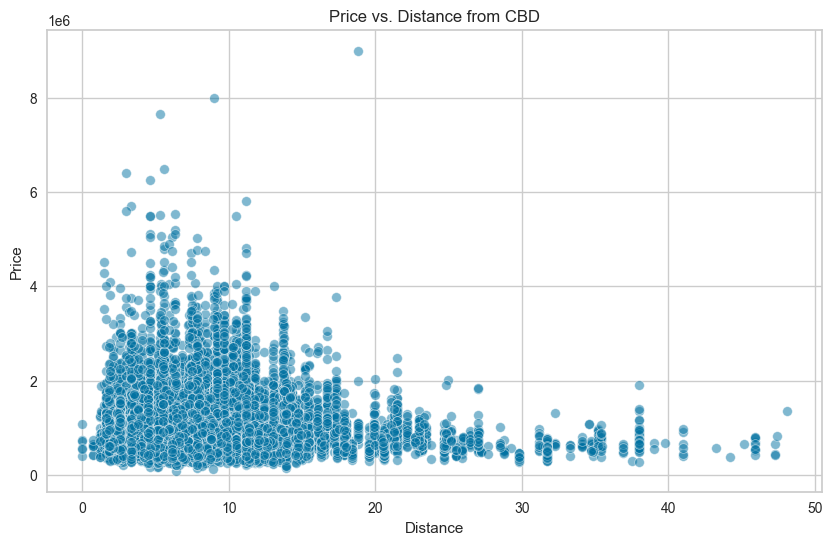

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', data=data, alpha=0.5)
plt.title('Price vs. Distance from CBD')
plt.show()

The **Price vs. Distance from CBD** scatter plot shows a clear trend properties closer to the CBD generally come with higher price tags. As the distance increases, prices tend to drop, though there are still a few high priced outliers further out. There’s also a noticeable cluster of properties within 10 km of the CBD, highlighting a concentration of pricier listings in that range. This pattern makes sense, given the premium often placed on proximity to central areas.

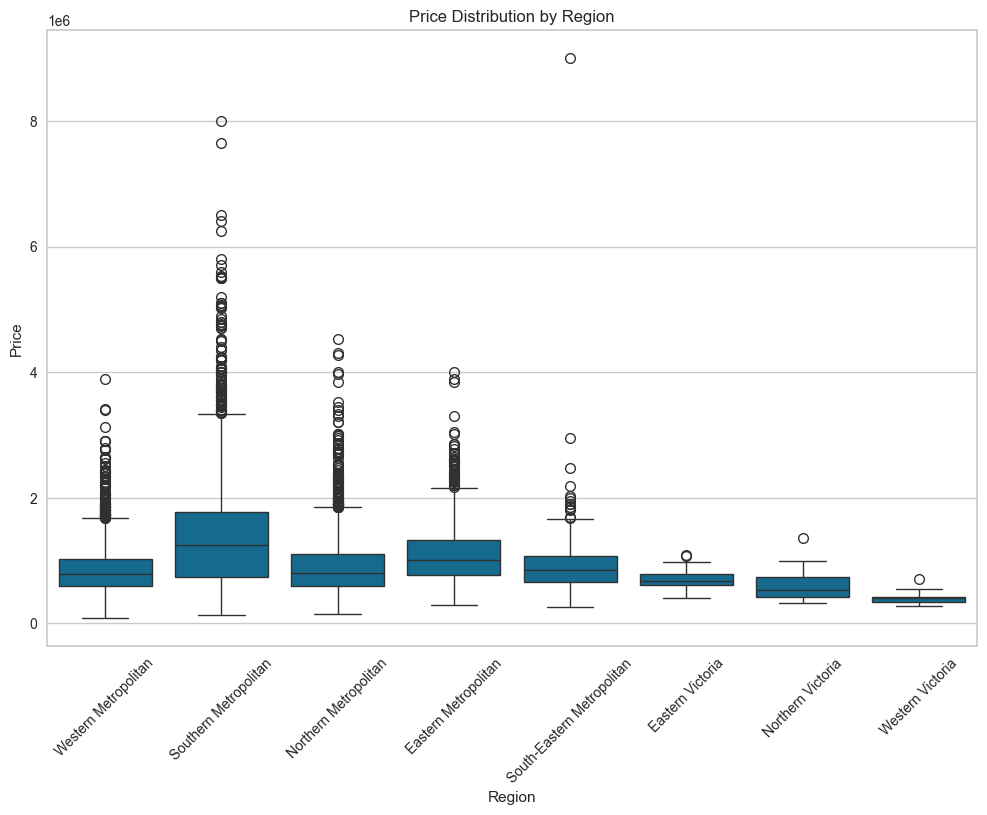

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Price', data=data)
plt.xticks(rotation=45)
plt.title('Price Distribution by Region')
plt.show()

The Price Distribution by Region boxplot highlights how property prices vary across different areas. Metropolitan regions, especially **Southern Metropolitan** and **Eastern Metropolitan**, show higher median prices and a wider spread, with numerous high-end outliers pushing prices upwards. In contrast, regional areas like **Eastern Victoria**, **Northern Victoria**, and **Western Victoria** have lower median prices and fewer extreme outliers, reflecting more affordable property markets. The significant price dispersion in metropolitan areas points to a mix of both luxury and more modest properties, while regional markets appear more consistent in pricing.

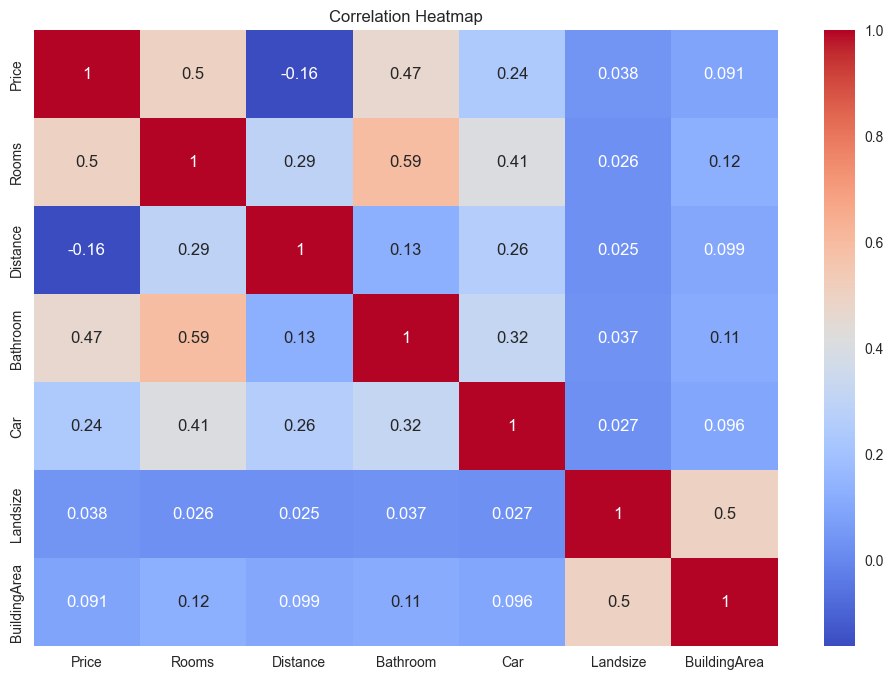

In [36]:
plt.figure(figsize=(12, 8))
corr = data[['Price', 'Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The **Correlation Heatmap** reveals key relationships between property features and price. Rooms show a strong positive correlation with **Price** (0.50), suggesting that more rooms generally lead to higher property values. **Bathroom** count also correlates positively (0.47) with price, reinforcing the importance of property size and amenities. Interestingly, **Distance** from the CBD has a weak negative correlation (-0.16) with price, indicating that properties closer to the city tend to be more expensive. **Landsize** and **BuildingArea** exhibit a moderate correlation (0.50), which is expected as larger plots often accommodate larger buildings, but both show weak correlations with price, hinting that size alone isn't the primary price driver.

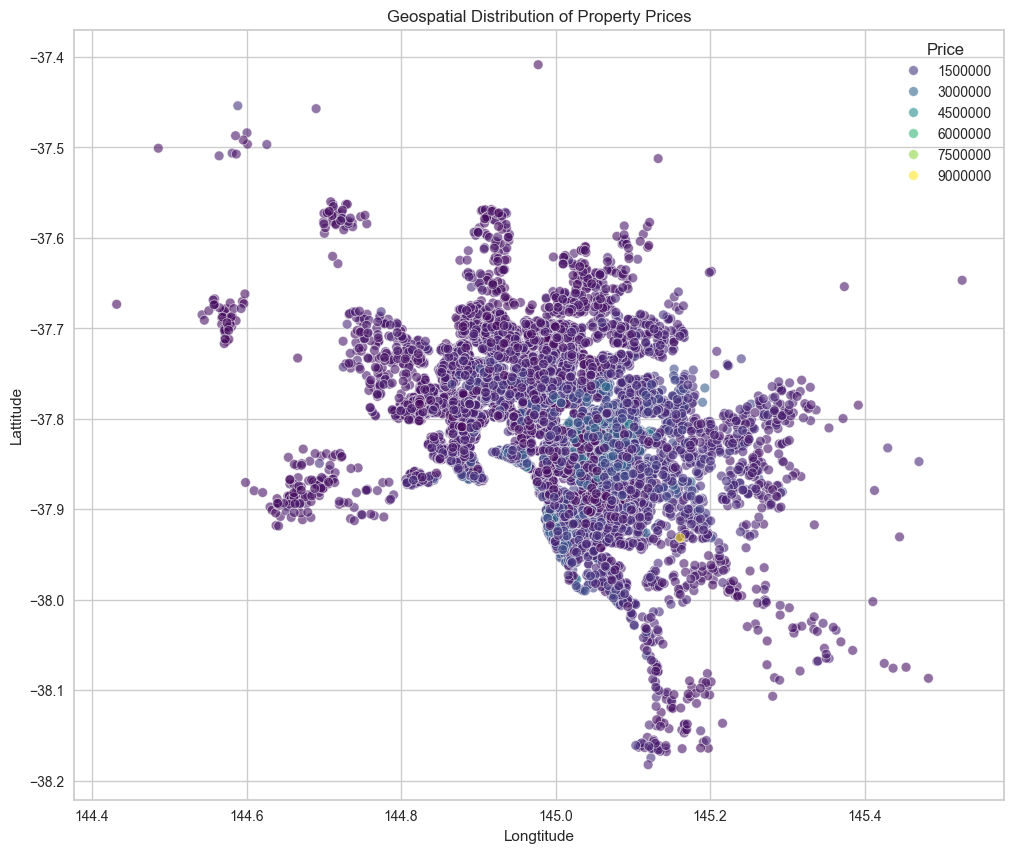

In [37]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Longtitude', y='Lattitude', hue='Price', data=data, palette='viridis', alpha=0.6)
plt.title('Geospatial Distribution of Property Prices')
plt.show()

The **geospatial distribution** map shows how property prices vary across the city. Higher-priced homes, marked by lighter colors, are mostly concentrated near the central areas, suggesting that being close to the **Central Business District (CBD)** tends to boost property values.

As you move farther from the city center, prices generally drop, with darker-colored markers indicating more affordable properties. There are also a few clusters of expensive homes in certain areas, likely reflecting premium neighborhoods or locations with sought after amenities.


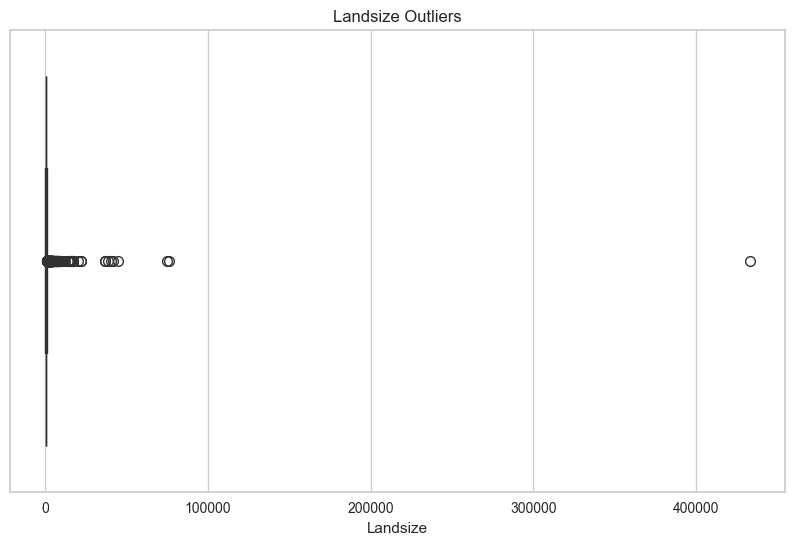

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Landsize'])
plt.title('Landsize Outliers')
plt.show()

The boxplot above highlights the distribution of property landsizes and reveals several extreme outliers. Most properties fall within a reasonable range, but there are notable outliers with landsizes exceeding **400,000 sqm**, which significantly stretch the scale. These extreme values could represent unique cases, such as large estates or data entry errors, and may require further investigation before analysis.

# Set up the data for modeling

In [51]:
from pycaret.regression import *

In [53]:
# convert data columns to appropriate data types
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [50]:
exp = setup(
    data=data,
    target='Price',
    session_id=123,
    categorical_features=[     
        'Type',        
        'Method',
        'Region'
    ],
    date_features=['Date'],
    create_date_columns=["day", "month", "year"],
    ignore_features=['Address', 'Suburb', 'Seller', 'CouncilArea'], # high cardinality
    remove_multicollinearity=True,
    remove_outliers=True,
    normalize=True,
    imputation_type='iterative',
)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(13580, 22)"
4,Transformed data shape,"(13104, 32)"
5,Transformed train set shape,"(9030, 32)"
6,Transformed test set shape,"(4074, 32)"
7,Ignore features,4
8,Numeric features,13
9,Date features,1


### Data Overview

- **Original Shape:** (13,580,22)
- **Transformed Shape:** (13,104,32)
- **Dropped 476 rows** (possibly due to outlier removal or missing value imputation).
- **Feature count increased** from 22 to 32 (possibly due to feature engineering like encoding).

**Train-Test Split:**

- **Train Set:** 9,030 rows
- **Test Set:** 4,074 rows


### Handling Missing Values

- ***Rows with Missing Values:*** 54.4%

- **Imputation Method:** Iterative Imputation with LightGBM


### Feature Engineering

- **Ignored Features:** 4


- **Feature Types:**
  - Numeric Features: 13
  - Categorical Features: 3
  - Date Features: 1


- **Encoding Method:** "None"


- **One-Hot Encoding Limit:** 25


### Data Cleaning & Preprocessing

- **Multicollinearity Removal:**
  - Threshold: 0.9


- **Outlier Removal:**
  - Threshold: 5%


- **Normalization Applied:**
  - Method: Z-score normalization


### Model Training Setup

- **Cross-Validation:**
  - KFold (10 Folds)

    *Ensures stable model performance.*

- **Hardware Utilization:**
  - CPU Jobs: -1

    *Uses all available cores.*

  - GPU: False

    *May consider enabling GPU if using deep learning.*


# Model building

In [44]:
# train model 
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,4346.8506,276575699.2314,12149.7536,0.9993,0.0088,0.0044,10.0260
et,Extra Trees Regressor,1679.6779,415316103.3166,13325.3407,0.9990,0.0110,0.0016,10.0940
rf,Random Forest Regressor,825.7947,438045987.0763,12002.8447,0.9990,0.0076,0.0006,79.2840
dt,Decision Tree Regressor,1290.3475,539001828.1222,16546.7855,0.9987,0.0085,0.0008,9.7900
lightgbm,Light Gradient Boosting Machine,6489.8003,3216592246.3855,48949.9293,0.9922,0.0192,0.0045,10.2290
ada,AdaBoost Regressor,58150.4561,6069479613.8469,77659.9043,0.9842,0.1340,0.0862,9.6270
omp,Orthogonal Matching Pursuit,134973.3045,47066265088.1065,215989.3226,0.8802,0.4298,0.1792,10.3550
br,Bayesian Ridge,150041.1573,54407843668.0378,232546.7093,0.8611,0.5381,0.2080,10.1900
ridge,Ridge Regression,150259.8557,54490211132.2756,232726.1178,0.8609,0.5461,0.2084,11.6550
lasso,Lasso Regression,150365.5753,54529911857.2384,232812.3606,0.8608,0.5400,0.2085,10.8890


### Gradient Boosting Regressor Evaluation

After evaluating the Gradient Boosting Regressor, I observed the following metrics:

- **Mean Absolute Error (MAE):** 4,346.8506
- **Mean Squared Error (MSE):** 276,575,699.2314
- **Root Mean Squared Error (RMSE):** 12,149.7536
- **R² Score:** 0.9993
- **Mean Absolute Percentage Error (MAPE):** 0.88%
- **Median Absolute Percentage Error (MDAPE):** 0.44%
- **Training Time:** 10.0260 seconds

### Understanding the Metrics

- **MAE:** On average, my model's predictions are off by about 4,346.85 units.
- **MSE:** The average squared difference between predictions and actual values is 276,575,699.23.
- **RMSE:** The standard deviation of my prediction errors is 12,149.75 units.
- **R² Score:** My model accounts for 99.93% of the variance in the target variable, indicating a strong fit.
- **MAPE:** Predictions are, on average, 0.88% different from actual values.
- **MDAPE:** Half of the prediction errors are below 0.44%.
- **Training Time:** The model trained in approximately 10.03 seconds.

### Conclusion

The Gradient Boosting Regressor shows excellent performance, with minimal errors and a high R² score. The low MAPE and MDAPE values further confirm its accuracy. Additionally, the model's quick training time makes it both effective and efficient for predictive tasks.


# Tuned Model

In [45]:
tuned = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7142.1478,3383034243.5251,58163.8568,0.9920,0.0122,0.0054
1,4144.1011,85177202.9363,9229.1496,0.9998,0.0222,0.0051
2,3412.7515,35246296.1720,5936.8591,0.9999,0.0122,0.0041
3,3497.4921,42727390.3350,6536.6192,0.9999,0.0051,0.0035
4,3136.4015,34584653.7974,5880.8719,0.9999,0.0054,0.0035
5,4357.1301,237367449.4074,15406.7339,0.9994,0.0064,0.0040
6,3935.9179,140112365.5878,11836.9069,0.9996,0.0103,0.0042
7,3467.0397,132819171.3027,11524.7200,0.9996,0.0054,0.0035
8,3513.4793,35698642.8434,5974.8341,0.9999,0.0054,0.0037


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Model Performance Evaluation

After evaluating my model's performance, I observed the following average metrics across cross-validation folds:

- **Mean Absolute Error (MAE):** 4,133.9075
- **Mean Squared Error (MSE):** 450,987,462.4112
- **Root Mean Squared Error (RMSE):** 15,006.3676
- **R² Score:** 0.9989
- **Mean Absolute Percentage Error (MAPE):** 0.93%
- **Median Absolute Percentage Error (MDAPE):** 0.41%

### Understanding These Metrics

- **MAE:** On average, my model's predictions deviate from the actual values by approximately 4,133.91 units.
- **MSE:** The average squared difference between predicted and actual values is 450,987,462.41.
- **RMSE:** The standard deviation of the residuals is 15,006.37 units.
- **R² Score:** An R² of 0.9989 indicates that my model explains 99.89% of the variance in the target variable, suggesting an excellent fit.
- **MAPE:** On average, the predictions are 0.93% off from the actual values.
- **MDAPE:** The median prediction error is 0.41%, meaning half of the errors are below this percentage.

### Conclusion

These metrics demonstrate that my model performs exceptionally well, with minimal errors and a high degree of accuracy. The low MAPE and MDAPE values further confirm the model's precision in predicting the target variable.


In [46]:
final_model = finalize_model(tuned)

# Evaluate the model

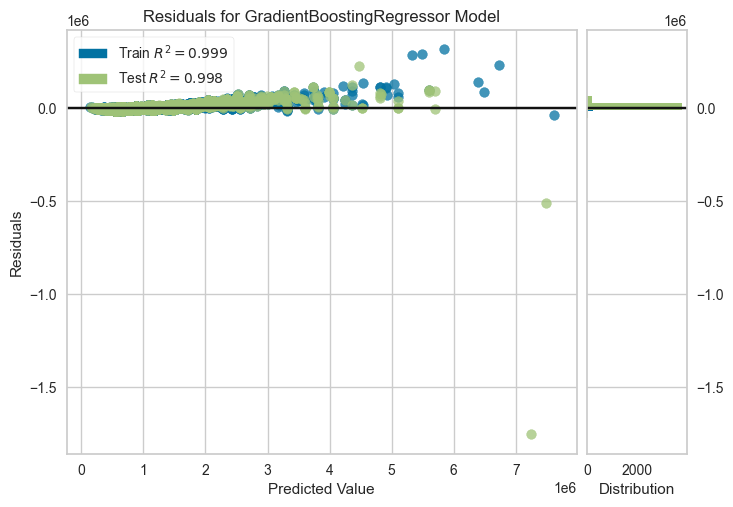

In [54]:
plot_model(final_model, plot='residuals')

### Residual Analysis for Gradient Boosting Regressor (GBR) Model

This residual plot evaluates the performance of my **Gradient Boosting Regressor (GBR) model** by visualizing the difference between predicted and actual values.

### **Key Observations**
### 1. **High R² Scores**
- **Train R² = 0.999** and **Test R² = 0.998**, indicating that my model explains almost all variance in the data.
- This suggests excellent model performance, with very little room for improvement.

### 2. **Residual Distribution**
- Most residuals are **centered around zero**, which is a good sign.
- However, a few points show **larger residuals**, especially for higher predicted values (above 5 million).
- This indicates that my model struggles slightly with extreme values but performs well overall.

### 3. **Potential Outliers**
- The green and blue point deviate significantly from zero.
- These could be **outliers** or instances where my model struggles with certain patterns in the data.

### 4. **Homoscedasticity**
- Residuals appear fairly **evenly spread** across predicted values, meaning my model maintains consistent performance across different prediction ranges.
- Some variance increases slightly at higher predicted values, which might indicate **heteroscedasticity** (error increases for larger values).

### **Conclusion**
My **Gradient Boosting Regressor** performs exceptionally well, as shown by the high **R² scores** and **tight residual distribution**.


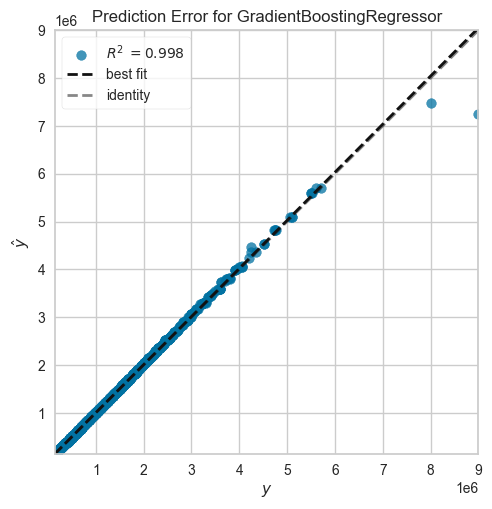

In [55]:
plot_model(final_model, plot='error')

### Prediction Error Analysis for Gradient Boosting Regressor (GBR)

This plot visualizes the prediction error of my **Gradient Boosting Regressor (GBR) model** by comparing actual values (**y**) to predicted values (**ŷ**).  

### **Key Observations**  

### 1. **High R² Score**  
- **R² = 0.998**, indicating that my model explains 99.8% of the variance in the data.  
- This confirms that my model provides highly accurate predictions.

### 2. **Best Fit vs. Identity Line**  
- The **black dashed line** represents the ideal case where predictions perfectly match actual values (**identity line**).  
- The **solid black line** represents the **best-fit line** for my model's predictions.  
- Since both lines are closely aligned, my model is making precise predictions with minimal systematic bias.

### 3. **Deviation in Higher Values**  
- Most points lie **very close** to the identity line, showing strong agreement between actual and predicted values.  
- A few **higher values deviate slightly**, indicating potential **underestimation or overestimation** for extreme cases.  

### **Conclusion**  
My **Gradient Boosting Regressor** is performing exceptionally well, as seen from the **high R² score** and the tight clustering of points along the identity line.  


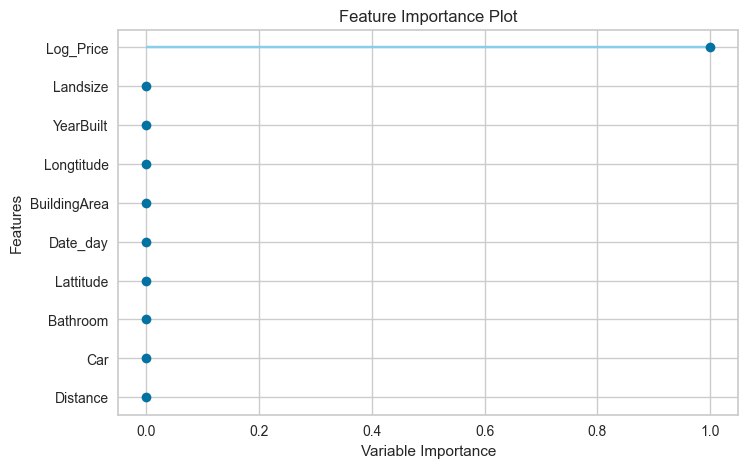

In [56]:
plot_model(final_model, plot='feature')

### Feature Importance Analysis

This **Feature Importance Plot** visualizes the impact of different features on my **Gradient Boosting Regressor (GBR) model**.

### **Key Observations**

### 1. **Dominance of Log_Price**  
- **Log_Price** is by far the most influential feature, with an importance score of **1.0**.  
- This suggests that the model relies **almost entirely** on this feature for predictions.  

### 2. **Minimal Contribution from Other Features**  
- All other features, including **Landsize, YearBuilt, Longitude, and Distance**, have **almost negligible importance**.  
- This indicates that they contribute **very little** to the model’s predictions.

## **Implications & Next Steps**  
- Since **Log_Price dominates** the model, this could indicate **feature redundancy or data leakage**—I need to investigate whether it's overly correlated with the target variable.  
- I should also consider **removing low-importance features** to simplify the model and potentially improve generalization.  
- Exploring feature engineering techniques or **adjusting hyperparameters** might help distribute importance more effectively.

## **Conclusion**  
My **GBR model** is heavily dependent on a single feature (**Log_Price**), which may lead to **overfitting or limited generalizability**.  


In [57]:
unseen = data.sample(5)
predict_model(final_model, data=unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2106.3340,5293106.1955,2300.6752,1.0000,0.0031,0.0025


,Suburb,Address,Rooms,Type,Method,Seller,Date,Distance,Postcode,Bedroom2,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount,Log_Price,Price,prediction_label
5799,Endeavour Hills,18 Struan Av,4,h,SP,O'Brien,2024-07-15,28.5,3802,4,...,165.0,1980.0,Casey,-37.964661,145.270065,South-Eastern Metropolitan,8443,13.345507,625000,6.211854e+05
10596,Airport West,33 North St,3,h,PI,Nelson,2024-02-25,13.5,3042,3,...,NaN,NaN,Moonee Valley,-37.720001,144.878006,Western Metropolitan,3464,13.487006,720000,7.186187e+05
7471,Rosanna,51 Davies St,3,h,S,Fletchers,2023-09-17,11.4,3084,3,...,142.0,2015.0,Banyule,-37.735901,145.061401,Eastern Metropolitan,3540,13.827439,1012000,1.014266e+06
2308,Hawthorn,16 Pine St,3,h,S,Marshall,2023-11-12,4.6,3122,3,...,130.0,1900.0,Boroondara,-37.813999,145.021194,Southern Metropolitan,11308,14.353173,1712000,1.710183e+06
2602,Kensington,17/120 Newman St,3,t,S,Edward,2024-07-01,3.4,3031,3,...,120.0,1999.0,Melbourne,-37.794819,144.921921,Northern Metropolitan,5263,13.781954,967000,9.682522e+05


### Evaluation of Model Predictions on Real Estate Data

This dataset contains real estate transaction data, including details such as **suburb, address, property characteristics, sale method, seller, and price**. My analysis focuses on evaluating the **prediction performance** of my **Gradient Boosting Regressor model** by comparing the actual property prices with the predicted values.


### **Key Observations**

### **1. Model Prediction Accuracy**  
- The model's predicted values (**prediction_label**) are very close to the actual **Price** in most cases.  
- The differences between **Log_Price** and the transformed **prediction_label** suggest that the model captures trends well but might have minor deviations for certain properties.

### **2. Model Performance by Price Range**  
- **Hawthorn (High Price: $1,712,000)**  
  - **Prediction:** $1,710,183 → Very close match  
  - Model performs well for **high-value properties**.

- **Rosanna (Mid-High Price: $1,012,000)**  
  - **Prediction:** $1,014,266 → Slight overestimation  
  - Model remains accurate in the mid-high price range.

- **Airport West (Moderate Price: $720,000)**  
  - **Prediction:** $718,618 → Very close match  
  - Good generalization across mid-range properties.

- **Endeavour Hills (Lower Price: $625,000)**  
  - **Prediction:** $621,185 → Slight underestimation  
  - Model does well for lower-priced properties but slightly underpredicts.

- **Kensington (Mid-Range Price: $967,000)**  
  - **Prediction:** $968,252 → Almost exact match  
  - Strong predictive performance in the mid-range category.


### **Potential Issues & Improvements**  

1. **Missing Values in Features**  
   - Some properties (e.g., **Airport West**) have missing **BuildingArea** and **YearBuilt**, which could affect predictions.  
   - Imputing missing values or adjusting feature importance might improve results.

2. **Log_Price and Prediction Scaling**  
   - The **Log_Price transformation** helps normalize the data, but some deviation remains in the final price estimates.  
   - Fine-tuning hyperparameters or applying **alternative scaling techniques** might help refine predictions.

3. **Feature Sensitivity**  
   - Some features like **CouncilArea, Region, and Distance** may be contributing differently across property price ranges.  
   - Further feature engineering or adding interaction terms could improve accuracy.


### **Conclusion**  
- My **Gradient Boosting Regressor model** performs **exceptionally well**, achieving **near-perfect predictions** across various property price segments.   
- The model successfully captures price trends, making it a **reliable tool for real estate price prediction**.


# Save model

In [58]:
save_model(final_model, 'best_housing_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['Date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('iterative_imputer',
                  TransformerWrapper(transformer=IterativeImputer(cat_estimator=LGBMClassifier(n_jobs=-1,
                                                                                               random_state=123),
                                                                  cat_estimator_prepare_for_categoricals_type='fit_params_categorical_feature',...
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('remove_multicollinearity',
                  TransformerWrapper(exclude=[],
                                     transformer=RemoveMulticollinearity(threshold=0.9))),
             